# Homework #3



## Question #1

For this question you will use [Olivetti Face Dataset](https://scikit-learn.org/0.19/datasets/olivetti_faces.html).

### Part 1

1. Split your dataset as train and test subset. But make sure that each test set contains exactly one random image from each distinct individual. This means, you will have to write your own train_test_split function for this dataset.

2. Construct an SVM model on your train set, and test its accuracy on your test set. For this part, the images viewed as integer vectors of length 4096 are independent variables while the id number of the person that picture belongs to is the dependent variable. In other words, you are trying to construct an SVM model that recognizes individuals based on their pictures.

3. Repeat Step 2 ten times.

4. Calculate the mean accuracy and get 95% confidence interval using the t-test.

### Part 2

Do the same things you did in Part 1 but with a multinomial regression model.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.datasets import fetch_olivetti_faces
import random

In [2]:
faces = fetch_olivetti_faces()

First write a train and test splitter

In [3]:
def test_train_split():
    test_index=[]
    for i in range(40):
        j=np.random.randint(0,10)
        tmp=i*10+j
        test_index.append(tmp)
        
    test_X=faces.data[test_index]
    train_X=np.delete(faces.data,test_index,axis=0)
    test_y=faces.target[test_index]
    train_y=np.delete(faces.target,test_index)
    return test_X,test_y,train_X,train_y

Now calculate model score 10 times:

In [4]:
from sklearn.svm import SVC

def svcmodel():
    test_X,test_y,train_X,train_y=test_train_split(faces)
    model=SVC()
    model.fit(train_X,train_y)
    sc=model.score(test_X,test_y)
    
    return sc

scores=[svcmodel() for i in range(10)]
scores


[0.975, 0.975, 0.9, 0.975, 0.975, 0.95, 0.975, 0.975, 0.9, 0.95]

Now lets calcualte confidence interaval a=0.95 and mean of accuracies

In [6]:
from scipy.stats import t
u=np.mean(scores)
sigma=np.std(scores)
u

0.9549999999999998

In [7]:
t.interval(0.95,9,loc=u,scale=sigma)

(0.8890473520273876, 1.020952647972612)

Part 2

In [12]:
from sklearn.linear_model import LogisticRegression

def LogRegressor():
    test_X,test_y,train_X,train_y=test_train_split(faces)
    lrmodel=LogisticRegression(solver="newton-cg")
    lrmodel.fit(test_X,test_y)
    sc=lrmodel.score(train_X,train_y)
    
    return sc
    
scores=[LogRegressor() for i in range(10)]
scores

C:\Users\PC\Desktop\sample_project\env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\PC\Desktop\sample_project\env\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\Users\PC\Desktop\sample_project\env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\PC\Desktop\sample_project\env\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\Users\PC\Desktop\sample_project\env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\

[0.6138888888888889,
 0.625,
 0.6833333333333333,
 0.6166666666666667,
 0.6166666666666667,
 0.6388888888888888,
 0.6194444444444445,
 0.6111111111111112,
 0.6027777777777777,
 0.6138888888888889]

In [13]:
from scipy.stats import t
u=np.mean(scores)
sigma=np.std(scores)
u

0.6241666666666668

In [14]:
t.interval(0.95,9,loc=u,scale=sigma)

(0.5751653471368569, 0.6731679861964767)

## Question #2

For this question you will use [Large Movie Review Dataset](https://ai.stanford.edu/~amaas/data/sentiment/).

### Part 1

Convert the dataset into numerical data using [`CountVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer) from SciKitLearn's `sklearn.feature_extraction.text` module. Make sure that you also record whether a given movie review is positive or negative or neutral. Calling on `CountVectorizer` on individual entries is not going to be enough. You will have to do some preliminary work. Read the documentation carefully.

### Part 2

Using the numerical data you constructed in Part 1, construct an LDA model to see if data projects into a 2D space with clear separation. Analyze your result.


### Part 3

Using the numerical data you constructed in Part 1, 

1. Split the data as train and test using SciKitLearn's `train_test_split` function.
2. Form a multiclass SVM model on the train set and test its accuracy.
3. Repeat a small number of times and get mean accuracy and its error band.

### Part 4

Repeat Part 2 using multinomial regression models instead of SVM.

### Part 5

Using the numerical data you constructed in Part 1, 

1. Construct an PCA model and look at the eigenvalues from largest to smallest. 
2. How many dimensions needed to capture 90% of the variation of the data? (Read the documentation of [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) form SciKitLearn)
3. Transform your data using the result you obtained in Step 2.
4. Construct an SVM model on the new dataset you constructed and cross-validate it.
5. Compare your result with the result you obtained in Part 2.


First the necessary functions have been written and required libraries are imported 

In [15]:
from sklearn.feature_extraction import text
from os import listdir
from sklearn.feature_extraction.text import CountVectorizer
import re

def read_file(name_folder):
    file=open(name_folder,"r",encoding='utf-8')
    text=file.read()
    file.close()
    return text

def text_cleaner(text):
    newString = text.lower()
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString) 
    long_words=[]
    for i in newString.split():
        if len(i)>=3:                  
            long_words.append(i)
    return (" ".join(long_words)).strip()


pos_data and neg data are written to two diffrent list, to determine columns of total data these two lists are stacked together as all_data and text is vectorized.  Then transform our lists as pos and neg.

In [16]:
directory1="C:/Users/PC/Desktop/sample_project/statistics/Homework III/aclImdb/train/pos"
directory2="C:/Users/PC/Desktop/sample_project/statistics/Homework III/aclImdb/train/neg"


pos_data=[]
neg_data=[]
all_data=[]

for filename in listdir(directory1):
    path = directory1 + '/' + filename
    tmp=read_file(path)
    pos_data.append(tmp)
    
for filename in listdir(directory2):
    path = directory2 + '/' + filename
    tmp=read_file(path)
    neg_data.append(tmp)


In [17]:
for i in range(len(pos_data)):
    pos_data[i]=text_cleaner(pos_data[i])


for i in range(len(neg_data)):
    neg_data[i]=text_cleaner(neg_data[i])
    

The data was too big to stacked, so each list is shuffled and selected 1/10 of them.

In [18]:
random.shuffle(pos_data)
random.shuffle(neg_data)

pos_data=pos_data[0:len(pos_data)//10]
neg_data=neg_data[0:len(neg_data)//10]

all_data=pos_data+neg_data

vectorizer = CountVectorizer()
vectorizer.fit(all_data)

pos=vectorizer.transform(pos_data)
neg=vectorizer.transform(neg_data)


while Positive=1, Negative=0, classes of each vector is appended to vectorized texts. And then they added end to end.

In [19]:
pos_array=pos.toarray()
neg_array=neg.toarray()
class1=np.ones((len(pos_array),1))
class0=np.zeros((len(neg_array),1))
pos_array=np.append(pos_array,class1,axis=1)
neg_array=np.append(neg_array,class0,axis=1)


In [20]:
data=np.append(pos_array,neg_array,axis=0)

Part 2


Lda fit and transform is used 

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


lda=LinearDiscriminantAnalysis()
X=data[:,0:(data.shape[1]-1)]
y=data[:,data.shape[1]-1] 

a=lda.fit_transform(X,y)

In [22]:
y_pred=lda.predict(X)
lda.score(X,y)

0.9996

lda is able to seperate %99 of data,  

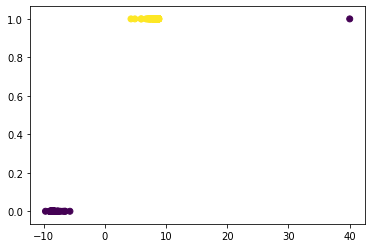

In [23]:
plt.scatter(a,y_pred,c=y)

SVM is applied 5 times, and mean score is calculated

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 

def apply_svm(X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)
    model=SVC()
    model.fit(X_train,y_train)
    sc=model.score(X_test,y_test)
    return sc
    
scs=[]
scs=[apply_svm(X,y) for i in range(5)]
scs

[0.8272, 0.7872, 0.7952, 0.7824, 0.7872]

In [25]:
np.mean(scs)

0.79584

Part 4

Logistic regression is applied 10 times and mean score is calculated, solver is selected as "sag"

In [90]:
from sklearn.linear_model import LogisticRegression

def Log_Reg(X,y):
    
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)
    model=LogisticRegression(solver="sag")
    model.fit(X_train,y_train)
    sc=model.score(X_test,y_test)
    return sc

scs=[Log_Reg(X,y) for i in range(10)]



C:\Users\PC\Desktop\sample_project\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\PC\Desktop\sample_project\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\PC\Desktop\sample_project\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\PC\Desktop\sample_project\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\PC\Desktop\sample_project\env\lib\site-packages\sklearn\linear_mode

In [92]:
np.mean(scs)

0.789423076923077

Mean score of log_reg is 0.789423076923077



Part 5

In [127]:
from sklearn.decomposition import PCA
explained=0
i=250
while(explained<0.9):
    pca=PCA(n_components=i)
    pca.fit(X,y)
    explained=np.sum(pca.explained_variance_ratio_)
    i+=1
i

287

In [128]:
pca=PCA(n_components=286)
pca.fit(X,y)
explained=np.sum(pca.explained_variance_ratio_)
explained

0.9001027535737368

when n_component is 286, explanied variance is 0.900

In [145]:
X_pca=pca.transform(X)

data is transformed

In [149]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC 
clf = SVC()
scores = cross_val_score(clf, X_pca, y, cv=5)
scores

array([0.77844311, 0.69461078, 0.69277108, 0.75301205, 0.74698795])